# Sample Notebook for Harvesting Detection

* The notebook includes the following procedures:
    * **Parcel time series plotting including transect activities**
    * **Harvesting detection including associated harvesting event metrics and signal plotting**
    * **Harvesting validation vis-a-vis transect activities data**

In [1]:
import sys
import os
from datetime import datetime, timedelta

#### Set the path to the scripts directory:

In [2]:
scriptsPath = '/home/andrea/PycharmProjects/Harvesting_Detection-main/Scripts'

if scriptsPath not in sys.path:
    sys.path.insert(0, scriptsPath)

#### Set the working directory to the directory where the scripts are saved:

In [3]:
os.chdir('/home/andrea/PycharmProjects/Harvesting_Detection-main')

#### Import relevant modules:

In [4]:
import time_series_local as ts
import harvesting as hv

In [5]:
from database.db import tables

tables(matching_text = 'transects_2020', all_records = True)

['tablelongtransects_2020_grd_coh12_vh',
 'tablelongtransects_2020_grd_coh12_vv']

In [ ]:
scriptsPath = '/mnt/code/sen4cbm/marker_devel'

if scriptsPath not in sys.path:
    sys.path.insert(0, scriptsPath)
os.chdir('/mnt/code/sen4cbm/marker_devel')
import functions.harvesting_functions as hv

## Parcel Plotting


#### This section enables the user to create time series plots of selected parcels. The user is also able to include harvesting transect activities on the plots if requested

##### Key variables to be set:
* **dataset**: *String - Name of the relevant 'dataset' with associated DB tables to extract time series data from. This dataset must be defined in the datasets.json config file*
* **bands**: *List - List of bands to process. Note that for the harvesting detection, coh12_vv has been determined to be the most useful*
* **geom_column**: *String - Name of the geom column for the parcels as it appears in the relevant table in postgres*
* **pidList**: *List - List of integers. Note that if only one parcel ID is defined, it still needs to be in a list*    
* **start_date**: *String - format must be '%Y%m%d'. The start_date is primarily for graphing purposes. Default if none specified is date of first entry in dataframe*
* **end_date**: *String - format must be '%Y%m%d'. The end_date is primarily for graphing purposes. Default if none specified is date of last entry in dataframe*
* **stat**: *String - The user can select from the following: 'mean', 'median', 'std', 'min', 'max', 'p5', 'p25', 'p75', 'p95'*
* **window_size**: *Integer - User can apply a moving average smoothing function to the data with a specified window size. Default is 5 as this has been found to be very useful in relation to the harvesting detection algorithm*
* **orbit**: *String - The user can plot only the Asc or Desc orbit if desired. The default (None) plots both together*
* **freq_avg**: *Boolean - The user can average the time series by a given frequency if desired instead of applying a moving window. Default is False*
* **frequency**: *String - If freq_avg is set to True, the user can determine the frequency to average the data by*
* **legend**: *Boolean - The user can select whether to display the legend which includes the parcel number, crop type and orbit*
* **logs**: *Boolean - The user can select whether to show the transect harvesting-related activities on the plot also. If True, the following activities will be displayed: Harvested crop (in red); Baled Straw (in green); Un baled straw (in orange); Stubble present (in blue); Cultivated stubble (in yellow)*
* **set_ylim**: *Boolean - The user can select whether to set ymin and ymax values for the signal plots if desired*
* **ymin**: *Float - If set_ylim is True, the user can define the minimum value to be displayed on the Y axis*
* **ymax**: *Float - If set_ylim is True, the user can define the maximum value to be displayed on the Y axis*

In [6]:
dataset = 'transects_2020'
bands = ['coh12_vv']
geom_column = 'geom'

pidList = [10,23]
#18,28,29
#pidList = [10,18,23,28,29,33,41,52,63,72,80,85,86,88,107,104,115,136,119,121,123,128,129,131,133,138,143,144,219,146,147,148,149,150,152,154,155,166,173,220,168,169,170,175,177,178,180,221,183,188,222,216,192,194,196,217,200,201,204,206,209,211,212,213,214,215,218,223,224,225,226,227,228,245,229,230,231,232,246,233,234,235,236,239,240,241,242,243,244,247,248,249,250,251,258,252,253,254,255,256,257,259,260,261,262,263,264,265,266,267,270,271,272,273,268,269,647,275,276,277,278,279,280,281,282,283,285,286,287,288,289,291,292,293,294,295,296,297,298,299,300,301,302,305,306,308,309,303,304,310,311,312,313,314,315,322,316,318,319,320,321,323,324,325,326,327,328,330,331,332,333,340,341,336,337,339,342,343,344,345,346,347,348,349,350,351,352,353,354,355,376,360,361,362,365,368,369,370,371,372,373,374,379,382,383,402,386,388,389,391,392,400,393,395,396,397,399,406,407,442,413,414,415,419,443,649,424,425,427,588,429,430,431,433,447,434,446,436,439,440,448,451,453,454,457,461,463,464,467,469,474,476,543,472,482,477,478,479,481,589,483,484,485,486,488,650,494,495,496,497,498,499,500,501,526,502,504,590,507,509,514,518,520,528,594,595,596,597,546,605,579,581,684,584,585,587,598,599,600,601,603,685,606,608,609,610,611,612,613,614,615,618,619,623,624,625,626,627,630,636,640,641,643,644,653,661,662,663,665,669,686,670,672,673,676,677,678,679,680,709,681,683,688,689,690,692,693,694,696,697,698,699,700,701,702,703,704,708,717,710,712,714,722,727,737,1070,746,749,750,753,756,764,769,781,773,783,795,786,787,807,804,810,816,820,822,825,1073,942,1055,1063,1067]
pidList = [str(pid) for pid in pidList]

start_date = '20200515'
end_date = '20201130'
stat = 'median'
window_size = 5
orbit = None # None, 'A' or 'D'
freq_avg = False
frequency = '1W' # can be set in days (e.g. '10D'), weeks (e.g. 'W'), months (e.g. 'M') etc.
legend = True
logs = True
set_ylim = True
ymin = 0.2
ymax = 0.6

#### Plot all the parcels in the pidList in separate plots:

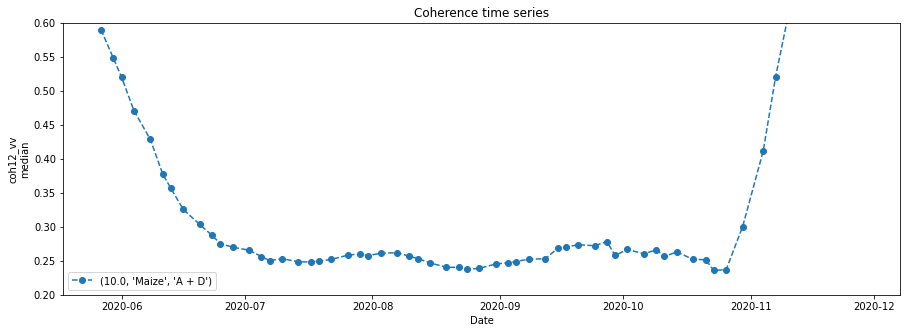

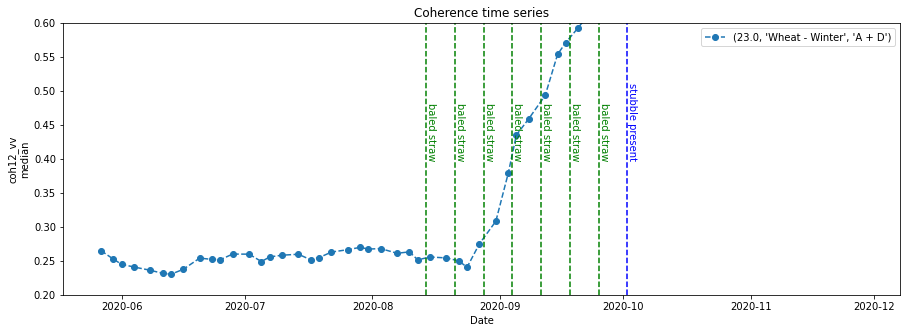

In [7]:
for pid in pidList:
    
    dfts = ts.parcelTimeSeriesDfLocal(dataset=dataset, pidList=pid, stat=None, bands=bands, geom_column=geom_column)

    ts.plotTimeSeriesLocal(dataset=dataset, df=dfts, stat=stat, bands=bands, start_date=start_date, end_date=end_date, 
                    freq_avg=freq_avg, frequency=frequency, window_size=window_size, orbit=orbit, legend=legend, 
                           logs=logs, set_ylim=set_ylim, ymin=ymin, ymax=ymax)

In [ ]:
for pid in pidList:
    hv.plotTimeSeriesLocal(pset=dataset, stat=stat, ylabel='cropclaim', p_id_list=pid, bands=bands, start_date=start_date, end_date=end_date, 
                    freq_avg=freq_avg, frequency=frequency, window_size=window_size, orbit=orbit, legend=legend, 
                           logs=logs, set_ylim=set_ylim, ymin=ymin, ymax=ymax)

In [ ]:
hv.plotTimeSeriesLocal(pset=dataset, stat=stat, ylabel='cropclaim', p_id_list=pidList, bands=bands, start_date=start_date, end_date=end_date, 
                    freq_avg=freq_avg, frequency=frequency, window_size=window_size, orbit=orbit, legend=legend, 
                           logs=logs, set_ylim=set_ylim, ymin=ymin, ymax=ymax)

## Harvesting Detection

#### This section runs the harvesting detection algorithm on all input parcels. It produces and prints a dictionary for each parcel which includes all the detected harvesting events and a series of descriptive metrics of the events which includes:
#### * area: the estimated area of an event calculated using the nunpy trapz function
#### * max_above_threshold: the value in an event which has the greatest difference to its corresponding threshold value (as per the thresholding algorithm this latter value is the user specified threshold x std deviation of the averaged filter)
#### * highCount: the percentage of values in an event which are above the minimum coherence value set by the user
#### * start_date: the start date of an event (this is the first point in an event where the parcel time series exceeds the threshold)
#### * end_date: the end date of an event (this is the last point in an event where the parcel time series exceeds the threshold)

#### This section also produces a plot for each parcel if requested which includes a graphic representation of the signal results from the thresholding algorithm. The user can also plot the transect harvesting-related activities if requested

##### Key variables to be set:
* **dataset**: *String - Name of the relevant 'dataset' with associated DB tables to extract time series data from. This dataset must be defined in the datasets.json config file*
* **bands**: *List - List of bands to process. Note that for the harvesting detection, coh12_vv has been determined to be the most useful*
* **geom_column**: *String - Name of the geom column for the parcels as it appears in the relevant table in postgres*
* **pidList**: *List - List of integers. Note that if only one parcel ID is defined, it still needs to be in a list*    
* **start_date**: *String - format must be '%Y%m%d'. The start_date is primarily for graphing purposes. Default if none specified is date of first entry in dataframe. Note that this date should be set prior to the actual date the user wishes to monitor from as the thresholdingAlgo() function applies a lag. Depending on the size of the lag, the effective monitoring start date will be the date of the first recorded coherence value after the lag. For example, if the start_date is set as 20200501 and a lag of 10 is set, then the effective monitoring date will be 10 captured dates after the start_date. If data has been captured approx every 3 days, then the effective monitoring date will be 20200531*
* **end_date**: *String - format must be '%Y%m%d'. The end_date is primarily for graphing purposes. Default if none specified is date of last entry in dataframe*
* **stat**: *String - The user can select from the following: 'mean', 'median', 'std', 'min', 'max', 'p5', 'p25', 'p75', 'p95'. Note that the 'median' has thus far shown to be most appropriate*
* **window_size**: *Integer - User can apply a moving average smoothing function to the data with a specified window size. Default is 5 as this has been found to be very useful in relation to the harvesting detection algorithm*
* **orbit**: *String - The user can plot only the Asc or Desc orbit if desired. The default (None) plots both together*
* **lag**: *Integer - The number of previous dates to calculate the smoothed average filter from for each point. Note that a lag of 10 has thus far shown to be most appropriate*
* **threshold**: *Integer/Float - The number of standard deviations from the moving mean above which the algorithm will classify a new datapoint as being a signal. Note a threshold of 3 has thus far shown to be most appropriate*
* **influence**: *Integer/Float - determines the influence of signals on the algorithm's detection threshold. If put at 0, signals have no influence on the threshold, such that future signals are detected based on a threshold that is calculated with a mean and standard deviation that is not influenced by past signals. Value must be between 0 and 1. Note an influence of 0.1 has thus far shown to be most appropriate*
* **show_signals**: *Boolean - The User can set whether to show the signal result array for a parcel*
* **show_signal_plots**: *Boolean - The user can set whether to display the signal plots which show the results of the thresholdingAlgo() function*
* **min_coh**: *Float - The minimum coherence value below which no returned signal will be considered as a possible harvesting event. Default is 0.4 (for VV median)*
* **logs**: *Boolean - The user can select whether to show the transect harvesting-related activities on the plot also. If True, the following activities will be displayed: Harvested crop (in red); Baled Straw (in green); Un baled straw (in orange); Stubble present (in blue); Cultivated stubble (in yellow)*
* **set_ylim**: *Boolean - The user can select whether to set ymin and ymax values for the signal plots if desired*
* **ymin**: *Float - If set_ylim is True, the user can define the minimum value to be displayed on the Y axis*
* **ymax**: *Float - If set_ylim is True, the user can define the maximum value to be displayed on the Y axis*

In [8]:
dataset = 'transects_2020'
bands = ['coh12_vv']
geom_column = 'geom'

pidList = [10, 23]
#pidList = [10,18,23,28,29,33,41,52,63,72,80,85,86,88,107,104,115,136,119,121,123,128,129,131,133,138,143,144,219,146,147,148,149,150,152,154,155,166,173,220,168,169,170,175,177,178,180,221,183,188,222,216,192,194,196,217,200,201,204,206,209,211,212,213,214,215,218,223,224,225,226,227,228,245,229,230,231,232,246,233,234,235,236,239,240,241,242,243,244,247,248,249,250,251,258,252,253,254,255,256,257,259,260,261,262,263,264,265,266,267,270,271,272,273,268,269,647,275,276,277,278,279,280,281,282,283,285,286,287,288,289,291,292,293,294,295,296,297,298,299,300,301,302,305,306,308,309,303,304,310,311,312,313,314,315,322,316,318,319,320,321,323,324,325,326,327,328,330,331,332,333,340,341,336,337,339,342,343,344,345,346,347,348,349,350,351,352,353,354,355,376,360,361,362,365,368,369,370,371,372,373,374,379,382,383,402,386,388,389,391,392,400,393,395,396,397,399,406,407,442,413,414,415,419,443,649,424,425,427,588,429,430,431,433,447,434,446,436,439,440,448,451,453,454,457,461,463,464,467,469,474,476,543,472,482,477,478,479,481,589,483,484,485,486,488,650,494,495,496,497,498,499,500,501,526,502,504,590,507,509,514,518,520,528,594,595,596,597,546,605,579,581,684,584,585,587,598,599,600,601,603,685,606,608,609,610,611,612,613,614,615,618,619,623,624,625,626,627,630,636,640,641,643,644,653,661,662,663,665,669,686,670,672,673,676,677,678,679,680,709,681,683,688,689,690,692,693,694,696,697,698,699,700,701,702,703,704,708,717,710,712,714,722,727,737,1070,746,749,750,753,756,764,769,781,773,783,795,786,787,807,804,810,816,820,822,825,1073,942,1055,1063,1067]
pidList = [str(pid) for pid in pidList]

start_date = '20200501'
end_date = '20201130'
stat = 'median'
window_size = 5
orbit = None
lag = 10
threshold = 3
influence = 0.1
show_signals = False
show_signal_plots = True
min_coh = 0.4
logs = True
set_ylim = True
ymin = 0.1
ymax = 0.6

10


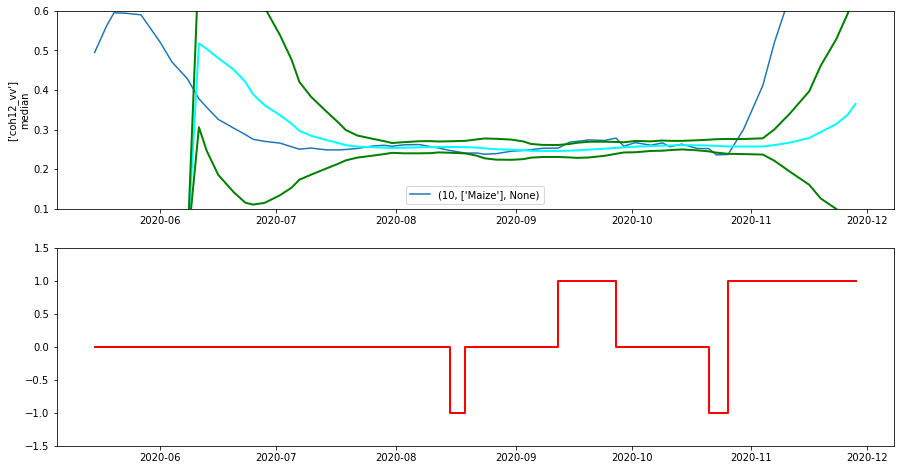

{1: {'area': 2.44, 'max_above_threshold': 0.4124, 'highCount': 89, 'startDate': '2020-10-30', 'endDate': '2020-11-28'}}


23


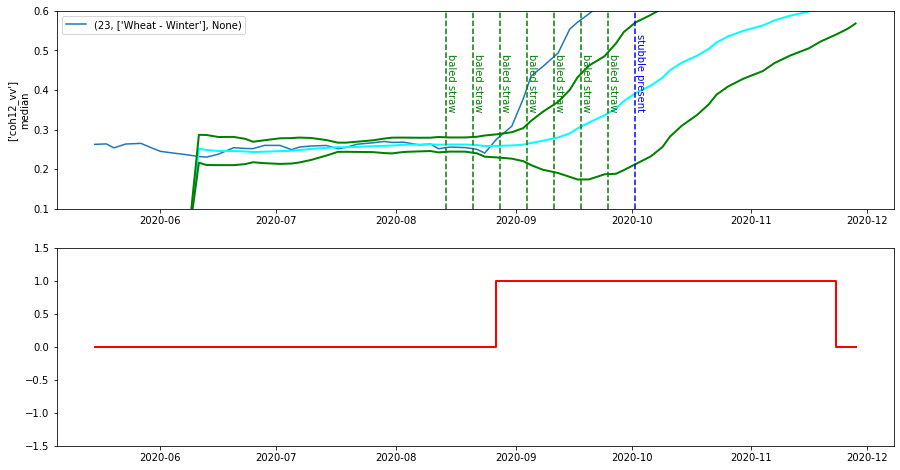

{0: {'area': 2.28, 'max_above_threshold': 0.1837, 'highCount': 93, 'startDate': '2020-08-31', 'endDate': '2020-11-28'}}




In [9]:
for pid in pidList:
    
    print(pid)
    
    dfts = ts.parcelTimeSeriesDfLocal(dataset=dataset, pidList=pid, stat=None, bands=bands, geom_column=geom_column)

    harvesting_events = hv.harvestDetection(dataset=dataset, df=dfts, band=bands, start_date=start_date, 
                                            end_date=end_date, stat=stat, window_size=window_size, orbit=orbit, 
                                            lag=lag, threshold=threshold, influence=influence, 
                                            show_signals=show_signals, show_signal_plots=show_signal_plots,
                                            min_coh=min_coh, logs=logs, set_ylim=set_ylim, ymin=ymin, ymax=ymax)
    
    print(harvesting_events[1])
    print('\n')

## Harvesting Detection Validation vis-a-vis Transect Harvesting-Related Activities

#### This section runs the harvesting detection algorithm on all input parcels and then computes whether the harvesting events detected for a given parcel correspond with the first transect harvesting-related activity for that parcel. Summary statistics are provided at the end which show the overall levels of correspondence and non-correspondence, and also the number of parcels with no harvesting events detected at all.

#### Along with the standard parameters, the user must also set the number of days prior to and after the first transect harvesting-related activity for a given parcel that they wish to consider appropriate for determining whether the start date of a detected harvesting event corresponds with a transect harvesting event or not

#### This section also produces a plot for each parcel if requested which includes a graphic representation of the signal results from the thresholding algorithm. The user can also plot the transect harvesting-related activities if requested

##### Key variables to be set:
* **dataset**: *String - Name of the relevant 'dataset' with associated DB tables to extract time series data from. This dataset must be defined in the datasets.json config file*
* **bands**: *List - List of bands to process. Note that for the harvesting detection, coh12_vv has been determined to be the most useful*
* **geom_column**: *String - Name of the geom column for the parcels as it appears in the relevant table in postgres*
* **pidList**: *List - List of integers. Note that if only one parcel ID is defined, it still needs to be in a list*    
* **start_date**: *String - format must be '%Y%m%d'. The start_date is primarily for graphing purposes. Default if none specified is date of first entry in dataframe. Note that this date should be set prior to the actual date the user wishes to monitor from as the thresholdingAlgo() function applies a lag. Depending on the size of the lag, the effective monitoring start date will be the date of the first recorded coherence value after the lag. For example, if the start_date is set as 20200501 and a lag of 10 is set, then the effective monitoring date will be 10 captured dates after the start_date. If data has been captured approx every 3 days, then the effective monitoring date will be 20200531*
* **end_date**: *String - format must be '%Y%m%d'. The end_date is primarily for graphing purposes. Default if none specified is date of last entry in dataframe*
* **stat**: *String - The user can select from the following: 'mean', 'median', 'std', 'min', 'max', 'p5', 'p25', 'p75', 'p95'. Note that the 'median' has thus far shown to be most appropriate*
* **window_size**: *Integer - User can apply a moving average smoothing function to the data with a specified window size. Default is 5 as this has been found to be very useful in relation to the harvesting detection algorithm*
* **orbit**: *String - The user can plot only the Asc or Desc orbit if desired. The default (None) plots both together*
* **lag**: *Integer - The number of previous dates to calculate the smoothed average filter from for each point. Note that a lag of 10 has thus far shown to be most appropriate*
* **threshold**: *Integer/Float - The number of standard deviations from the moving mean above which the algorithm will classify a new datapoint as being a signal. Note a threshold of 3 has thus far shown to be most appropriate*
* **influence**: *Integer/Float - determines the influence of signals on the algorithm's detection threshold. If put at 0, signals have no influence on the threshold, such that future signals are detected based on a threshold that is calculated with a mean and standard deviation that is not influenced by past signals. Value must be between 0 and 1. Note an influence of 0.1 has thus far shown to be most appropriate*
* **show_signals**: *Boolean - The User can set whether to show the signal result array for a parcel*
* **show_signal_plots**: *Boolean - The user can set whether to display the signal plots which show the results of the thresholdingAlgo() function*
* **min_coh**: *Float - The minimum coherence value below which no returned signal will be considered as a possible harvesting event. Default is 0.4 (for VV median)*
* **logs**: *Boolean - The user can select whether to show the transect harvesting-related activities on the plot also. If True, the following activities will be displayed: Harvested crop (in red); Baled Straw (in green); Un baled straw (in orange); Stubble present (in blue); Cultivated stubble (in yellow)*
* **set_ylim**: *Boolean - The user can select whether to set ymin and ymax values for the signal plots if desired*
* **ymin**: *Float - If set_ylim is True, the user can define the minimum value to be displayed on the Y axis*
* **ymax**: *Float - If set_ylim is True, the user can define the maximum value to be displayed on the Y axis*
* **days_plus**: *integer - The number of days after a transects harvesting-related event to determine harvest detection correspondence*
* **days_minus**: *integer - The number of days before a transects harvesting-related event to determine harvest detection correspondence*

In [ ]:
from database.db import config
from database import db_queries

In [ ]:
dataset = 'transects_2020'
bands = ['coh12_vv']
geom_column = 'geom'

pidList = [18,28,29,80,123,282]
#pidList = [10,18,23,28,29,33,41,52,63,72,80,85,86,88,107,104,115,136,119,121,123,128,129,131,133,138,143,144,219,146,147,148,149,150,152,154,155,166,173,220,168,169,170,175,177,178,180,221,183,188,222,216,192,194,196,217,200,201,204,206,209,211,212,213,214,215,218,223,224,225,226,227,228,245,229,230,231,232,246,233,234,235,236,239,240,241,242,243,244,247,248,249,250,251,258,252,253,254,255,256,257,259,260,261,262,263,264,265,266,267,270,271,272,273,268,269,647,275,276,277,278,279,280,281,282,283,285,286,287,288,289,291,292,293,294,295,296,297,298,299,300,301,302,305,306,308,309,303,304,310,311,312,313,314,315,322,316,318,319,320,321,323,324,325,326,327,328,330,331,332,333,340,341,336,337,339,342,343,344,345,346,347,348,349,350,351,352,353,354,355,376,360,361,362,365,368,369,370,371,372,373,374,379,382,383,402,386,388,389,391,392,400,393,395,396,397,399,406,407,442,413,414,415,419,443,649,424,425,427,588,429,430,431,433,447,434,446,436,439,440,448,451,453,454,457,461,463,464,467,469,474,476,543,472,482,477,478,479,481,589,483,484,485,486,488,650,494,495,496,497,498,499,500,501,526,502,504,590,507,509,514,518,520,528,594,595,596,597,546,605,579,581,684,584,585,587,598,599,600,601,603,685,606,608,609,610,611,612,613,614,615,618,619,623,624,625,626,627,630,636,640,641,643,644,653,661,662,663,665,669,686,670,672,673,676,677,678,679,680,709,681,683,688,689,690,692,693,694,696,697,698,699,700,701,702,703,704,708,717,710,712,714,722,727,737,1070,746,749,750,753,756,764,769,781,773,783,795,786,787,807,804,810,816,820,822,825,1073,942,1055,1063,1067]
pidList = [str(pid) for pid in pidList]

start_date = '20200501'
end_date = '20201130'
stat = 'median'
window_size = 5
orbit = None
lag = 10
threshold = 3
influence = 0.1
show_signals = False
show_signal_plots = True
min_coh = 0.4
logs = True
set_ylim = True
ymin = 0.1
ymax = 0.9

days_plus = 45
days_minus = 20

In [ ]:
final_list = []
activities_list = ['harvested crop', 'baled straw', 'un baled straw', 'stubble present', 
                  'cultivated stubble']

for pid in pidList:
    
    # Extract the transects activities log for a given parcel:
    conf_file = os.path.join(os.getcwd(),'config/datasets.json')
    dfActivities = db_queries.getLogActivities(pid=pid, dataset=config.read(conf_file)[dataset])
    
    # Extract all the harvesting-related activities in the log:
    harvesting_activities = {}
    for key, value in sorted(dfActivities.items()):
        for key1, value1 in value.items():
            for activity in activities_list:
                if str(value1).lower().split('/')[0] == activity:
                    harvesting_activities[key] = value1

    # Return a dictionary with the first harvesting-related event for the given parcel from the activities log:
    if harvesting_activities:
        first_activity = next(iter(harvesting_activities.items()))
        
        #Run the harvestDetection() function on the parcel to return all possible harvesting events detected: 
        
        print(pid)    
    
        dfts = ts.parcelTimeSeriesDfLocal(dataset=dataset, pidList=pid, stat=None, bands=bands, geom_column=geom_column)

        harvesting_events = hv.harvestDetection(dataset=dataset, df=dfts, band=bands, start_date=start_date, 
                                             end_date=end_date, stat=stat, window_size=window_size, orbit=orbit, 
                                             lag=lag, threshold=threshold, influence=influence, 
                                             show_signals=show_signals, show_signal_plots=show_signal_plots, 
                                                min_coh=min_coh, logs=logs, set_ylim=set_ylim, ymin=ymin, ymax=ymax)

        # Extract just the start date for each possible harvesting event detected:
        event_start_dict = {}
        for key, value in harvesting_events[1].items():
            event_start_dict[key] = value['startDate'].replace('-','')
            
        # Return the activity date for the first harvesting-related transect activity as a string.
        # Then return the activity date plus the days_plus and the activity date minus the days_minus.
        # This gives the range within which a detected harvesting event will be deemed to correspond to a 
        # harvesting-related transect activity:
        activity_date = datetime.strptime(first_activity[0],'%Y%m%d')
        activity_date_plus = activity_date + timedelta(days=days_plus)
        activity_date_plus = datetime.strftime(activity_date_plus, '%Y%m%d')
        activity_date_minus = activity_date - timedelta(days=days_minus)
        activity_date_minus = datetime.strftime(activity_date_minus, '%Y%m%d')
        
        print('First harvest-related transect activity:\n' + '{}\n'.format(first_activity))
        
        # Determine whether each detected harvesting event corresponds to a harvest-related transect activity 
        # and print the results:
        pid_event_list = []
        if event_start_dict:
            print('Harvesting events detected by algorithm:')
            for key, value in sorted(event_start_dict.items()):
                date_int = int(value)
                if date_int < int(activity_date_minus):
                    pid_event_list.append(1)
                    print('Event: {} - Start Date: {} - Correspondence: No'.format(key, value))
                elif date_int >= int(activity_date_minus) and date_int <= int(activity_date_plus):
                    print('Event: {} - Start Date: {} - Correspondence: Yes'.format(key, value))
                    pid_event_list.append(2)
                elif date_int > int(activity_date_plus):
                    print('Event: {} - Start Date: {} - Correspondence: No'.format(key, value))
                    pid_event_list.append(3)

        else:
            print('No event detected')
            pid_event_list.append(4)
            
        final_list.append(pid_event_list)

        print('\n')

In [ ]:
corresponding_total = 0
non_corresponding_total = 0
no_event_total = 0
for l in final_list:
    if 2 in l:
        corresponding_total += 1
    elif 2 not in l and 4 not in l:
        non_corresponding_total += 1
    elif 4 in l:
        no_event_total += 1
        
print('Total number of parcels processed: {}\n'.format(str(len(final_list))))
print('Number of parcels with corresponding harvesting events: {}\n'.format(str(corresponding_total)))
print('Number of parcels with non-corresponding harvesting events only: {}\n'.format(str(non_corresponding_total)))
print('Number of parcels with no harvesting events detected: {}'.format(str(no_event_total)))

### Computing Confidence Scores for Harvesting Events (Experimental)

#### This piece of code can be run on the outputs of the harvestDetection() function to compute a confidence score for each detected harvesting event. The result is a dictionary with the event metrics which also includes an additional metric called 'conf'.

#### This function is purely experimental!! The confidence scores produced are completely arbitrary and are based on the following:
#### * 1) The mean for all area, max_above_threshold and highCount metrics was calculated for all detected harvesting events in the 320 arable transect parcels used in the original development of the harvesting detection algorithm.
#### * 2) Each metric is given an individual score for an event. If the value of the metric is greater than the mean, it is assigned a socre of 1. If it's below the mean, it is assigned a score in one of four brackets (0.2, 0.4, 0.6 or 0.8), depending on the value.
#### * 3) Once an individual score is assigned for each metric for a given event, the 3 scores are summed and divided by 3 to give an overall confidence score for the event

#### This function can easily be integrated to run on the full pidList defined by the user

In [ ]:
event_confidence = hv.computeConfidence(harvesting_events[1], harvesting_events[2], harvesting_events[3])

In [ ]:
print(event_confidence)